In [2]:
import xarray as xr
import matplotlib as plt

In [3]:
path = "/g/data/ik11/outputs/access-om2-025/025deg_jra55_iaf_omip2_cycle6/output364/ocean/ocean_month.nc"

In [4]:
uv = xr.open_dataset(path)[['u','v','dht']].isel(time=4)

/jobfs/153724570.gadi-pbs/ipykernel_3447826/2486942106.py:1: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  uv = xr.open_dataset(path)[['u','v','dht']].isel(time=4)


In [5]:
uv

<xarray.Dataset> Size: 933MB
Dimensions:   (st_ocean: 50, yu_ocean: 1080, xu_ocean: 1440, yt_ocean: 1080,
               xt_ocean: 1440)
Coordinates:
  * xt_ocean  (xt_ocean) float64 12kB -279.9 -279.6 -279.4 ... 79.38 79.62 79.88
  * yt_ocean  (yt_ocean) float64 9kB -81.08 -80.97 -80.87 ... 89.74 89.84 89.95
    time      datetime64[ns] 8B 2017-05-14T12:00:00
  * st_ocean  (st_ocean) float64 400B 1.152 3.649 6.565 ... 5.034e+03 5.254e+03
  * xu_ocean  (xu_ocean) float64 12kB -279.8 -279.5 -279.2 ... 79.5 79.75 80.0
  * yu_ocean  (yu_ocean) float64 9kB -81.02 -80.92 -80.81 ... 89.79 89.89 90.0
Data variables:
    u         (st_ocean, yu_ocean, xu_ocean) float32 311MB ...
    v         (st_ocean, yu_ocean, xu_ocean) float32 311MB ...
    dht       (st_ocean, yt_ocean, xt_ocean) float32 311MB ...
Attributes:
    filename:   ocean_month.nc
    title:      ACCESS-OM2
    grid_type:  mosaic
    grid_tile:  1
    history:    20210426T0414Z: /g/data/ik11/inputs/access-om2/bin/mppnccombi...

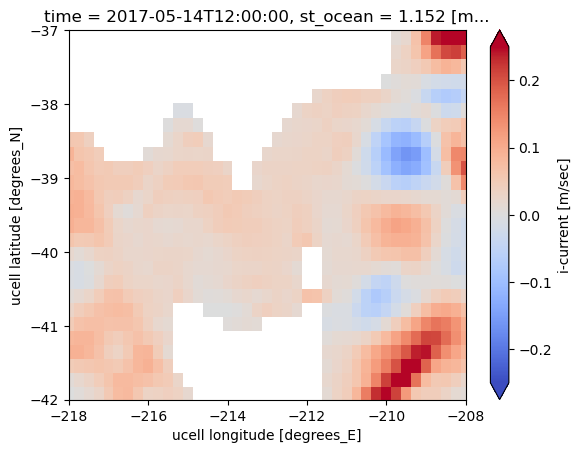

In [6]:
uv.u.isel(st_ocean=0).plot(xlim=[142 - 360, 152 - 360], ylim=[-42, -37], vmin=-0.25, vmax=0.25, cmap='coolwarm')

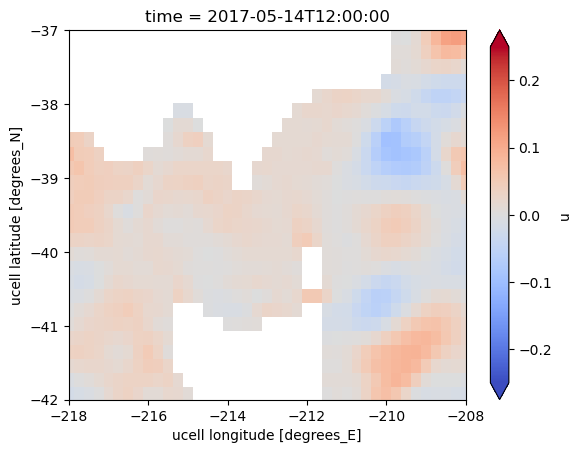

In [7]:
uv.u.mean('st_ocean').plot(xlim=[142 - 360, 152 - 360], ylim=[-42, -37], vmin=-0.25, vmax=0.25, cmap='coolwarm')

In [14]:
weights = xr.DataArray(uv.dht.fillna(0).data, dims=['st_ocean', 'yu_ocean', 'xu_ocean'])
weights

<xarray.DataArray (st_ocean: 50, yu_ocean: 1080, xu_ocean: 1440)> Size: 311MB
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)
Dimensions without coordinates: st_ocean, yu_ocean, xu_ocean

In [20]:
# umean = uv.u.weighted(weights).mean('st_ocean')
vmean = uv.v.weighted(weights).mean('st_ocean')

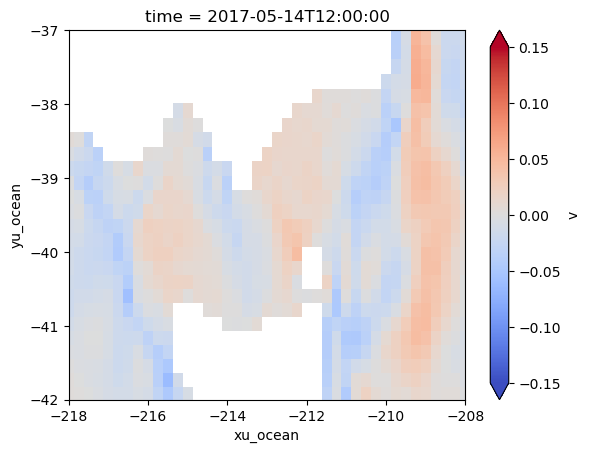

In [21]:
# umean.plot(xlim=[142 - 360, 152 - 360], ylim=[-42, -37], vmin=-0.15, vmax=0.15, cmap='coolwarm')
vmean.plot(xlim=[142 - 360, 152 - 360], ylim=[-42, -37], vmin=-0.15, vmax=0.15, cmap='coolwarm')

In [10]:
umean = (uv.u.fillna(0) * weights).sum('st_ocean') / weights.sum('st_ocean')

MemoryError: Unable to allocate 440. TiB for an array with shape (50, 1080, 1440, 1080, 1440) and data type float32